# Girvan and Newman algorithm

In [113]:
import networkx as nx
import matplotlib.pyplot as plt
import os
plt.rcParams["figure.figsize"] = (12, 12)
nets_path = "nets"

In [121]:
for r, s, files in os.walk(nets_path):
    for f in files:
        if f.split(".")[-1] == "net": # To avoid .clu files (for now)
            print(f"------- Network: {r}\{f} -----")
            g = nx.read_pajek(os.path.join(r, f))
            print(f"{g.number_of_nodes()} nodes, {g.number_of_edges()} edges.")

------- Network: nets\model\256_4_4_2_15_18_p.net -----
256 nodes, 4548 edges.
------- Network: nets\model\256_4_4_4_13_18_p.net -----
256 nodes, 4598 edges.
------- Network: nets\model\rb125.net -----
125 nodes, 426 edges.
------- Network: nets\real\airports_UW.net -----
3618 nodes, 14142 edges.
------- Network: nets\real\cat_cortex_sim.net -----
55 nodes, 1128 edges.
------- Network: nets\real\dolphins.net -----
62 nodes, 159 edges.
------- Network: nets\real\football.net -----
115 nodes, 613 edges.
------- Network: nets\real\zachary_unwh.net -----
34 nodes, 78 edges.
------- Network: nets\toy\20x2+5x2.net -----
50 nodes, 404 edges.
------- Network: nets\toy\graph3+1+3.net -----
7 nodes, 8 edges.
------- Network: nets\toy\graph4+4.net -----
8 nodes, 13 edges.
------- Network: nets\toy\grid-p-6x6.net -----
36 nodes, 72 edges.
------- Network: nets\toy\star.net -----
9 nodes, 8 edges.


## Testing on a single network

256 nodes, 4548 edges.


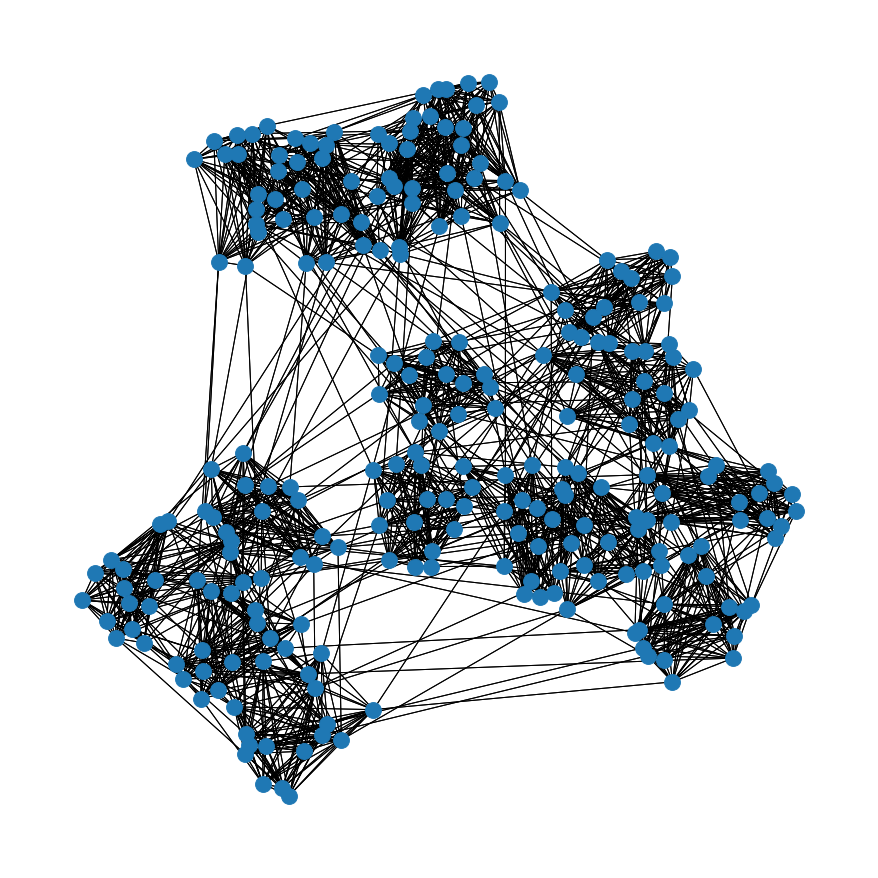

In [100]:
G1 = nx.read_pajek(os.path.join("nets", "model", "256_4_4_2_15_18_p.net"))
nx.draw(G1, node_size=250)
print(f"{G1.number_of_nodes()} nodes, {G1.number_of_edges()} edges.")
plt.savefig(os.path.join("images", "intro-plot.png"))

With the plot of this network, we are able to identify several communities with our human vision, as we are naturally able to make complex associations between objects. However, for real world usecases, we need to implement algorithms that can compute communities, like we are doing, based on different criteria specific to each algorithm: betweeness, maximum modularity and so on.

### Grivan and Newmann (GN)
The GN algorithm is one of the most famous community detection algorithm and also one of the most intuitive. The specificity of this algorithm is the use of \textbf{betweeness centrality} of an edge: the number of shortest path between nodes in which this edge is part of. At each iteration, the algorithm performs the following steps:
* Computing the betweeness centrality (BC) score for each edges
* Removing the edge with maximum BC  

and stops when there is no more maximum BC edge, therefore having only groupes of nodes or communities with the same BC score edges between them.

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman

communities = girvan_newman(G1)
node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print("Number of detected communities:", len(node_groups))

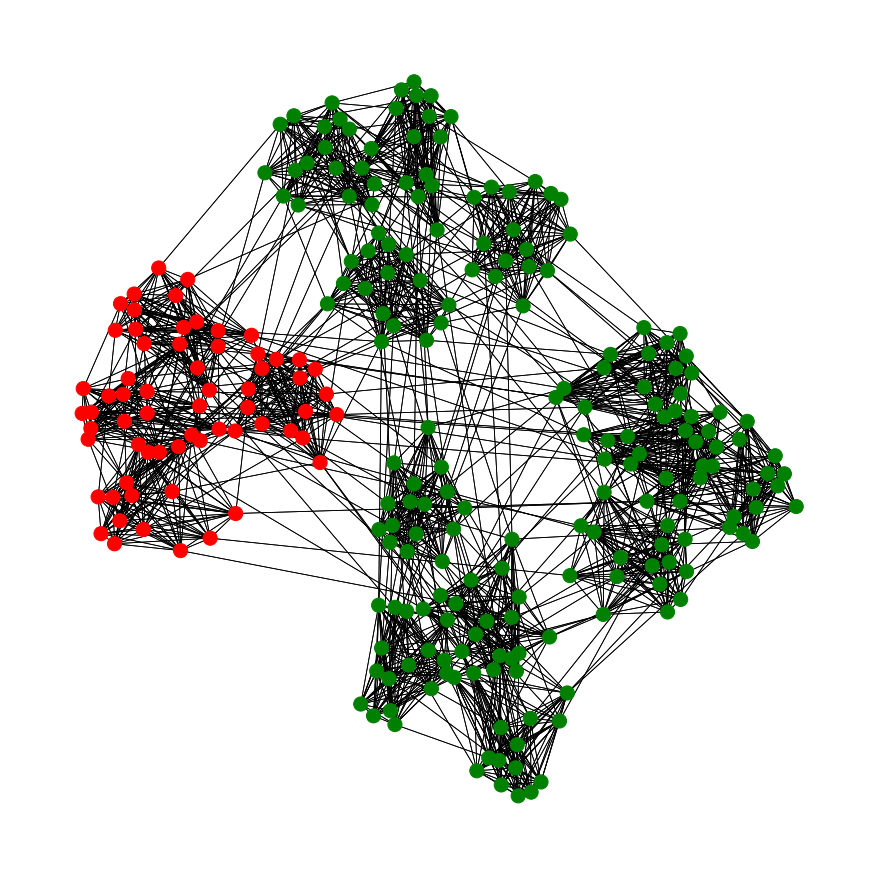

In [93]:
color_map = []
for node in G1:
    if node in node_groups[0]:
        color_map.append('green')
    else: 
        color_map.append('red')  
        
nx.draw(G1, node_color=color_map, node_size=200, width=0.8)
plt.savefig(os.path.join("images","GN-256_4_4_2_15_18_p.png"))

The above example was inspired from the NetworkX reference: https://networkx.guide/algorithms/community-detection/girvan-newman/

We can see that the algorithm was only able to identify two communities (although we could have expected to identify 4).
Therefore, we can interpret that every edges between green nodes have the same BC (with the same conclusion applying to the red community, with a different BC score).

#### Why the GN algorithm only considered two communities ?
In order to understand why the GN algorithm considered only two communities, we will compute by ourselves the BC between some of the green nodes and do the same for the red nodes.

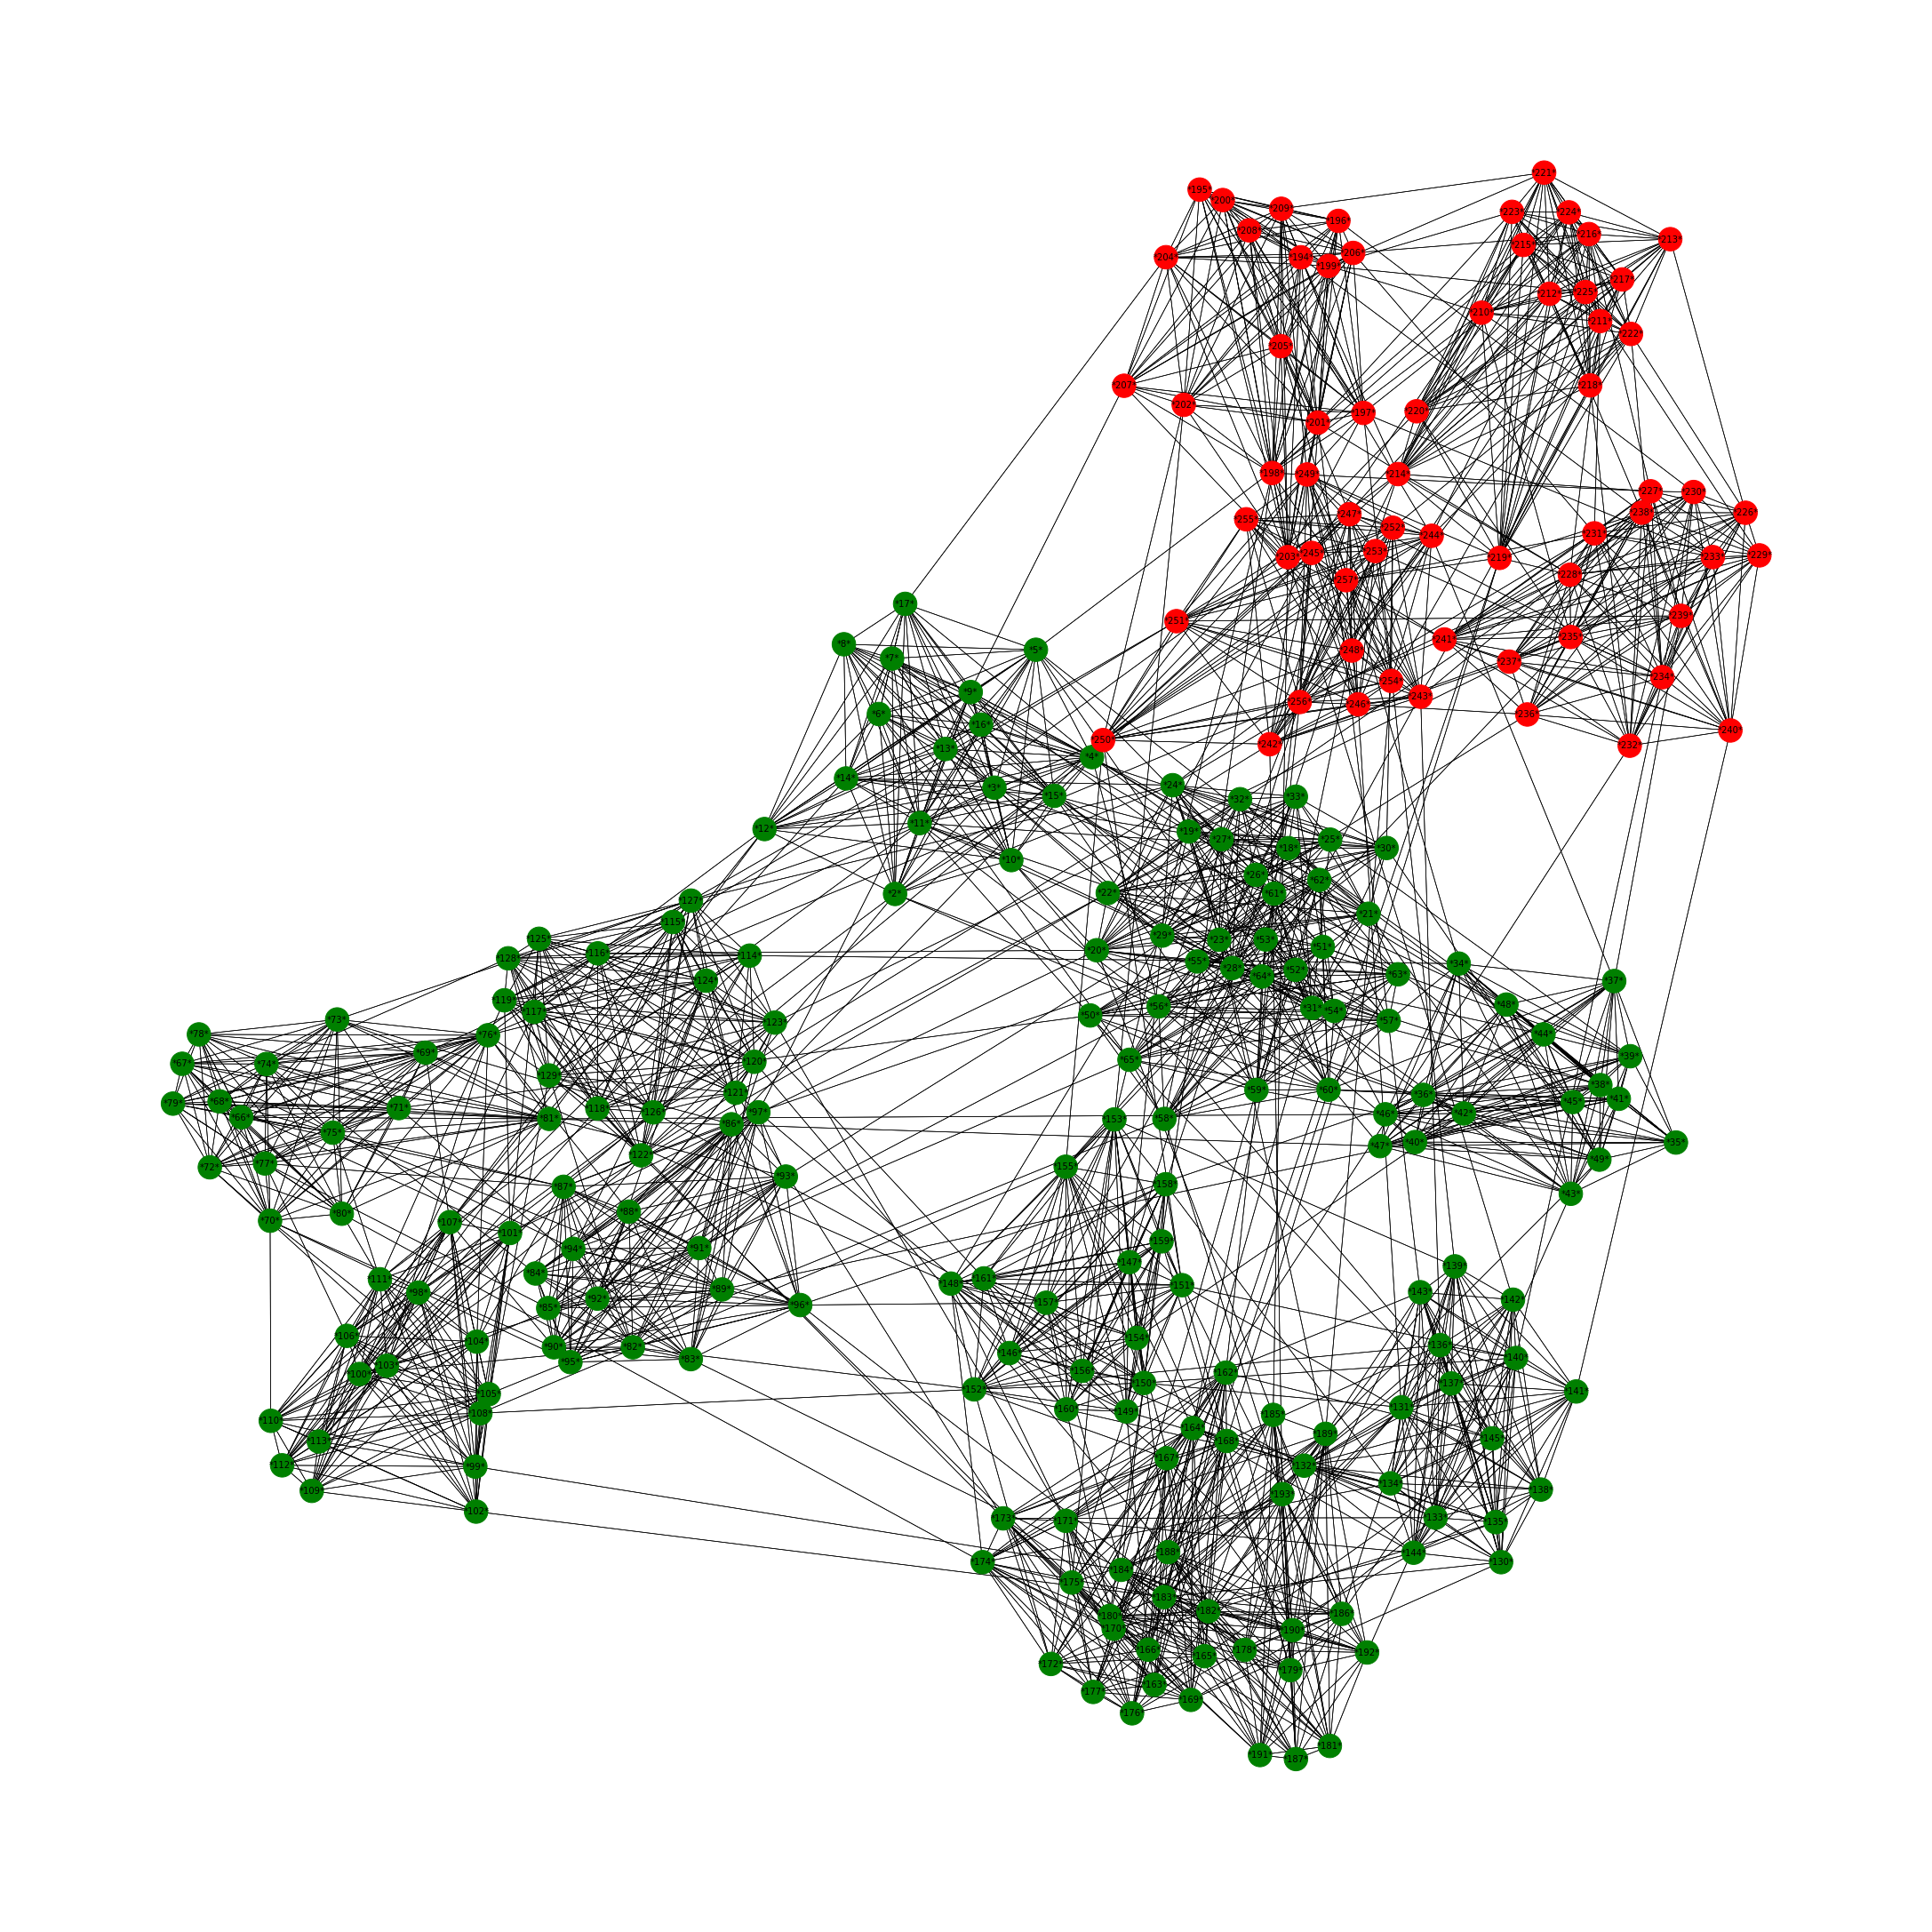

In [111]:
fig = plt.figure("high-res-GN-plot", figsize=(30, 30))
nx.draw(G1, node_color=color_map, node_size=700, width=0.7, with_labels=True, font_size=10)
plt.savefig(os.path.join("images", "high-res-GN-plot.png"))

We will use the following edges after identification on high-resolution plot REFERENCE TO THE PLOT IN APPENDIX (you may need to zoom in):
* Green nodes: 37 and 35 
* Green nodes: 62 and 57
* Red nodes: 229 and 239
* Red nodes: 226 and 229


In [105]:
# Computing BC score for each edges
bc_list = nx.edge_betweenness_centrality(G1)
focus_nodes = [(35, 37), (57, 62), (229, 239), (226, 229)]
focus_bc = [bc_list[(f"*{n[0]}*", f"*{n[1]}*", 0)] for n in focus_nodes] # As keys of bc_list are in the format (*n1*, *n2*, direction)
    

In [106]:
focus_bc

[0.0006867044488790519,
 0.0006892864840168714,
 0.000386647636356577,
 3.6802609115541633e-05]

We can see udpsquhdqpdusqhdpqdupsioq

### Community visualisation

Because we want to provide proper visualisation of the communities, we will use a layout algorithm offered by Kamada-Kawai (note: This algorithm is considering "springs" between each edges and compute the minimal energy the whole graph in order to render the network with minimal edge-overlapping. Original paper: https://doi.org/10.1016/0020-0190(89)90102-6) to visualise communtities.

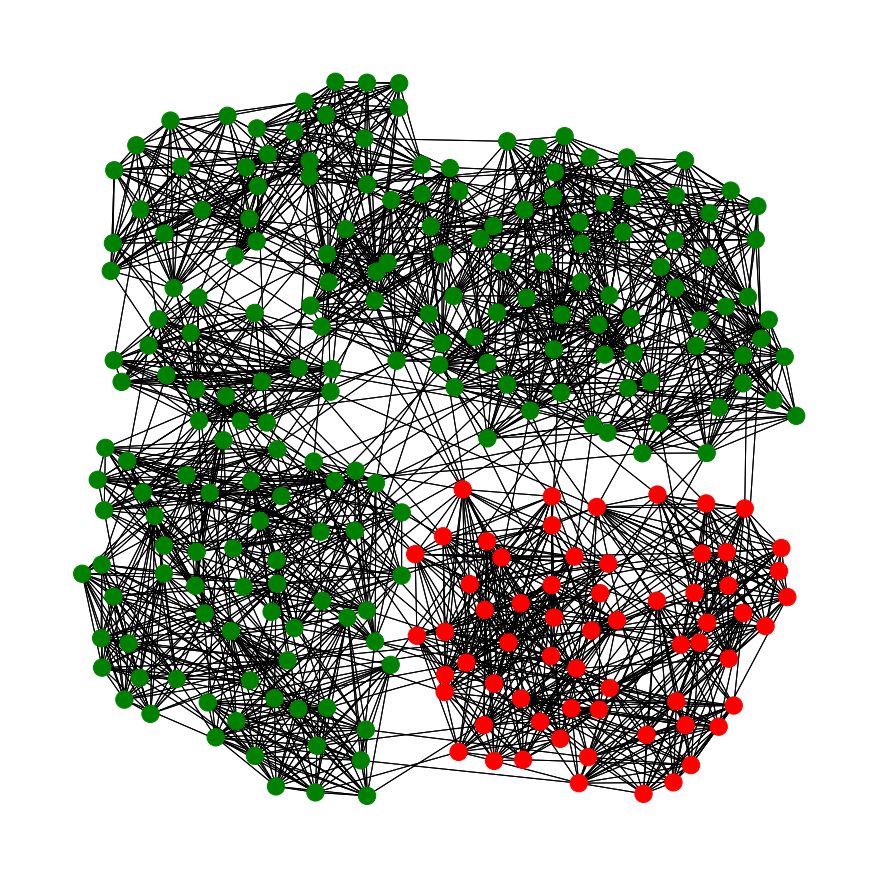

In [98]:
pos = nx.draw_kamada_kawai(G1, node_color=color_map)
plt.savefig(os.path.join("images","GN-256_4_4_2_15_18_p_KK.png"))